In [1]:
# Importing nessesary libraries
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Profiling
from ydata_profiling import ProfileReport

# Data Visualisation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

# The data

In [ ]:
# Use the kaggle API to pull the dataset 
!kaggle datasets download -d blastchar/telco-customer-churn

# Extract into folder on local
with ZipFile('telco-customer-churn.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
# Reading data from CSV file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option("display.max_columns", 30)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data source:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn <br>
**Originaly:** https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Each row represents a customer, each column contains customer’s attributes.


The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**Data dictonary:**
1. customerID:  A unique ID that identifies each customer
2. gender: The customer’s gender: Male, Female.
3. SeniorCitizen:  Indicates if the customer is 65 or older: True, False.
4. Partner:  Indicates if the customer has a partner: True, False.
5. Dependents: Indicates if the customer lives with any dependents: True, False. Dependents could be children, parents, grandparents, etc.
6. tenure: Indicates the total amount of months that the customer has been with the company.
7. PhoneService: Indicates if the customer subscribes to home phone service with the company: True, False.
8. MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service.
9. InternetService:  Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic.
10. OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service.
11. OnlineBackup:  Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service.
12. DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service.
13. TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service.
14. StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service. The company does not charge an additional fee for this service.
15. StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service. The company does not charge an additional fee for this service.
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
17. PaperlessBilling: Indicates if the customer has chosen paperless billing: True, False.
18. PaymentMethod: Indicates how the customer pays their bill: Electronic check, Mailed Check, Credit Card (automatic), Bank transfer (automatic).
19. MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
20. TotalCharges: Indicates the customer’s total charges, calculated to for their tenure.
21. Churn: Yes = the customer left the company. No = the customer remained with the company.

# Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Total Charges - transfomation to float and filling missing data

In [11]:
# Assessing rows with missing (' ') TotalCharges value
missing_values = df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].count()
print('Number of rows with missing TotalCharges values', missing_values)

# Replace string ' ' to 0 for customers with 0 tenure
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0

# Updating the value
missing_values = df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].count()
print('After clean up: Number of rows with missing TotalCharges values', missing_values)

# Change TotalCharges data type to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

Number of rows with missing TotalCharges values 11
After clean up: Number of rows with missing TotalCharges values 0


## Continous features

In [12]:
# Data quality table for contnuous features
continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a an empty dictionary for data quality information
dq_dict = {
    'Column': [],
    'Count': [],
    'Missing' : [],
    'Cardinality' : [],
    'Min': [],
    '1st qrt.': [],
    'Mean': [],
    'Median': [],
    '3rd qrt.': [],
    'Max' : [],
    'Std. Dev.' : []
}
# Create a dataframe based on the dictionary
df_dq = pd.DataFrame(dq_dict)


# Add information to the data frame
for column in continuous_columns:    
    info = [df[column].name, df[column].count(), df[column].isna().sum(), len(df[column].unique()),
            df[column].min(), df[column].quantile(q = 0.25), round(df[column].mean(),2), df[column].median(),
            df[column].quantile(q = 0.75), df[column].max(), round(df[column].std(),2)
           ]
    df_dq.loc[len(df_dq.index)] = info

# Replace index with column name
df_dq.set_index('Column', inplace = True)
df_dq

,Count,Missing,Cardinality,Min,1st qrt.,Mean,Median,3rd qrt.,Max,Std. Dev.
Column,,,,,,,,,,
tenure,7043,0,73,0.00,9.00,32.37,29.00,55.00,72.00,24.56
MonthlyCharges,7043,0,1585,18.25,35.50,64.76,70.35,89.85,118.75,30.09
TotalCharges,7043,0,6531,0.00,398.55,2279.73,1394.55,3786.60,8684.80,2266.79


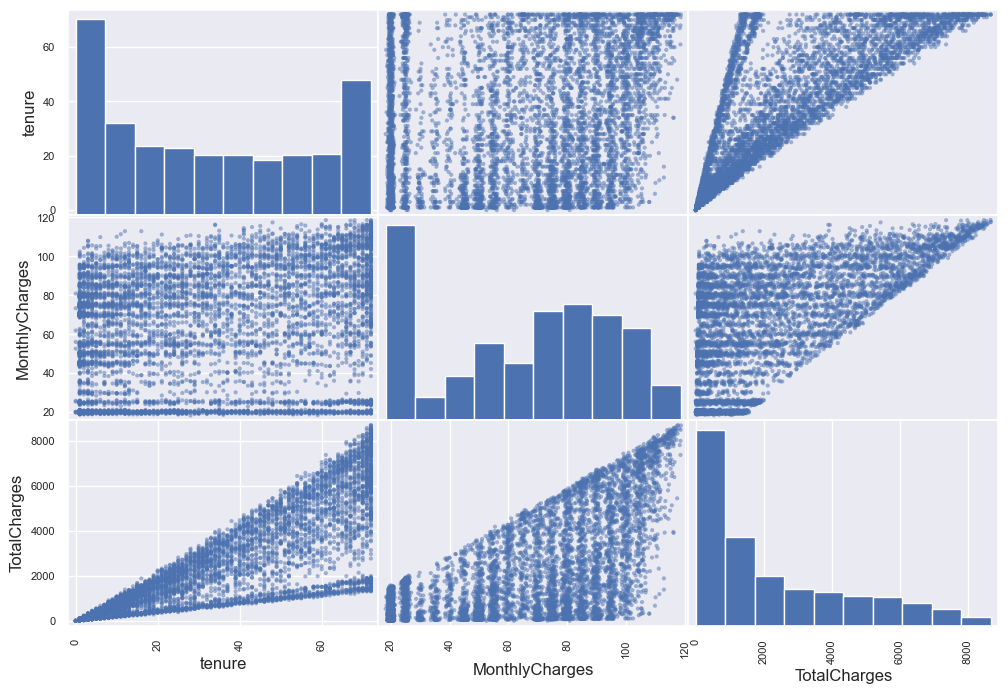

In [15]:
# Scatter matrix for the continuous features
scatter_matrix(df[continuous_columns], figsize=(12,8))
plt.show()

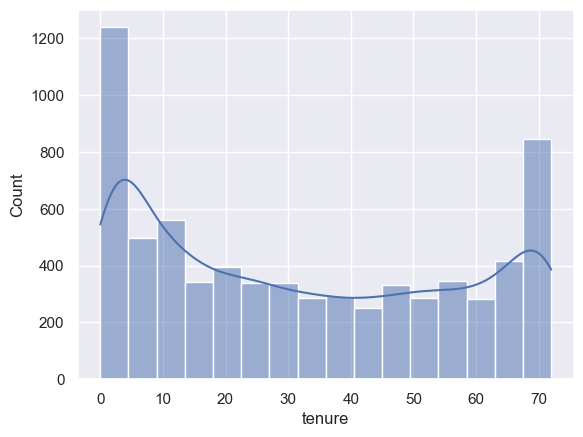

In [16]:
# Histogram for tenure
sns.histplot(df["tenure"], kde=True)
plt.show()

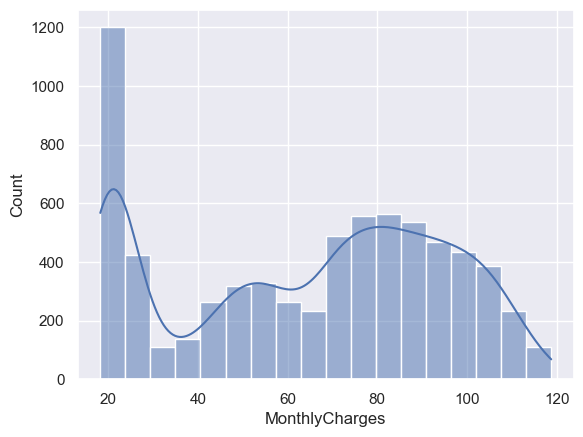

In [17]:
# Histogram for MonthlyCharges
sns.histplot(df["MonthlyCharges"], kde=True)
plt.show()

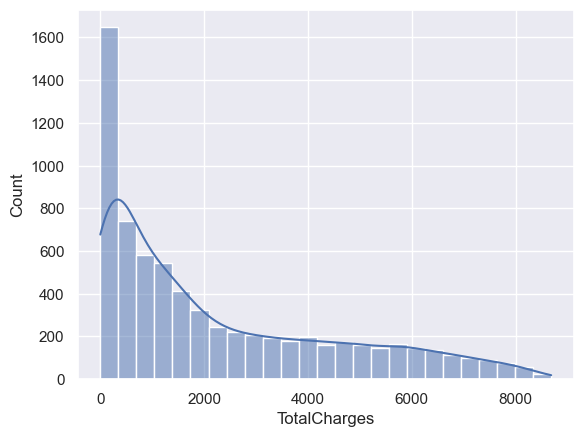

In [18]:
# Histogram for TotalCharges
sns.histplot(df["TotalCharges"], kde=True)
plt.show()

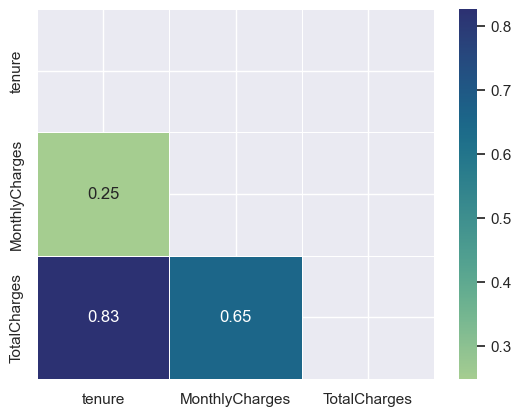

In [84]:
# Correlation matrix
corr = df[continuous_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df[continuous_columns].corr(), mask = mask,annot=True, fmt=".2f", cmap="crest", linewidth=.5)
plt.show()

### Outliers & Variance

In [38]:
# Function for identifying outliers in numeric dataset
# Logic: mean +/- 1.5 IQR
# Input: dataframe, column name (string)
# Output: dataframe with outliers

def outliers_list(dataframe, column):
    q1 = df[column].quantile(q = 0.25)
    q3 = df[column].quantile(q = 0.75)
    iqr = q3 - q1
    # Set lower an upper limit
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    # Find values for a given column that fall outside the limit
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    # Remove 0 values if any
    outliers = outliers[outliers[column] != 0]
    return(outliers)

In [39]:
# Run check for outliers in all numeric columns
for column in continuous_columns:
    no_of_outliers = len(outliers_list(df, 'tenure'))
    print('Number of outlier in column',column, 'is', no_of_outliers)

Number of outlier in column tenure is 0
Number of outlier in column MonthlyCharges is 0
Number of outlier in column TotalCharges is 0


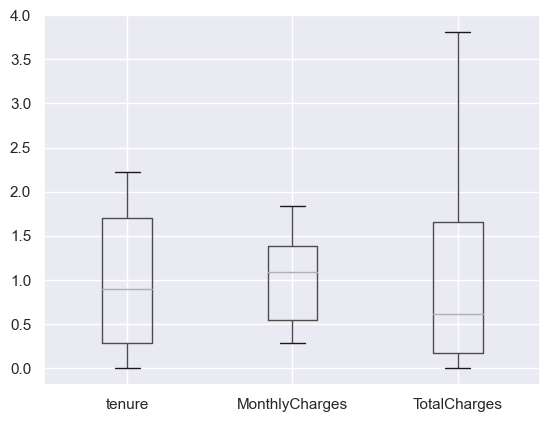

tenure            0.58
MonthlyCharges    0.22
TotalCharges      0.99
dtype: float64


In [44]:
# Normalised boxplot to compare variance in variables
normalised_df = df[continuous_columns] / df[continuous_columns].mean()

normalised_df.boxplot()
plt.show()

# Print feature variance
print(normalised_df.var().round(2))

## Categorical Features

In [20]:
# Categorical Features descriptives
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Data profile for categorical and boolean variables

In [8]:
# Profile the data
profile = ProfileReport(df, title="Profiling Report")

# Save the report as a HTML file
profile.to_file("data_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data pre-processing

In [45]:
# Importing pre-processing libraries
from sklearn.preprocessing import OneHotEncoder

In [46]:
# Drop customerID as it won't be used in the model
df = df.drop('customerID', axis=1)

### Tenure - Binning

In [160]:
# Binning tenure 1. under a year; 2. 1-4 years; 3. Over 4 years
df['Binned_tenure'] = pd.cut(
     df['tenure'],
     bins = [-np.inf, 12, 48, np.inf],
     labels = [1, 2, 3]
)

# Convert Binned_tenure to numeric
#df['Binned_tenure'] = df['Binned_tenure'].astype(float)

# Display crosstab for tenure bins and Churn
pd.crosstab(df['Churn'], df['Binned_tenure'], dropna=False, margins=True)

Binned_tenure,1,2,3,All
Churn,,,,
No,1149,1999,2026,5174
Yes,1037,619,213,1869
All,2186,2618,2239,7043


## Dummy values

In [62]:
# Create a list of categorical columns for one hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

def find_internet_service_cols(df):
    """
    Finds all columns in a DataFrame that include "No phone service" in the name.

    Args: df (pd.DataFrame): The DataFrame to search.

    Returns: list: A list of column names that include "No phone service".
    """
    # Filter column names containing "No internet service" (case-insensitive)
    return [col for col in df.columns if 'no internet service' in col.lower()]

# Find columns that duplicate information - No phone service or No internet service
no_service_cols = find_internet_service_cols(one_hot_df)
no_service_cols.append('MultipleLines_No phone service')

# Drop those columns
one_hot_df = one_hot_df.drop(no_service_cols, axis = 1)

one_hot_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [115]:
# Only numeric and categorical columns from the original dataframe
numeric_cols = df.select_dtypes(exclude=['object'])

# Preprocessed dataframe with encoded values
pp_df = pd.concat([numeric_cols,one_hot_df], axis = 1)

print('Shape of the preprocessed table:', pp_df.shape)

Shape of the preprocessed table: (7043, 25)


## Absence of Multicollinearity

In [76]:
# All features exluding tenure (Binned tenure used instead)
test_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Binned_tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']

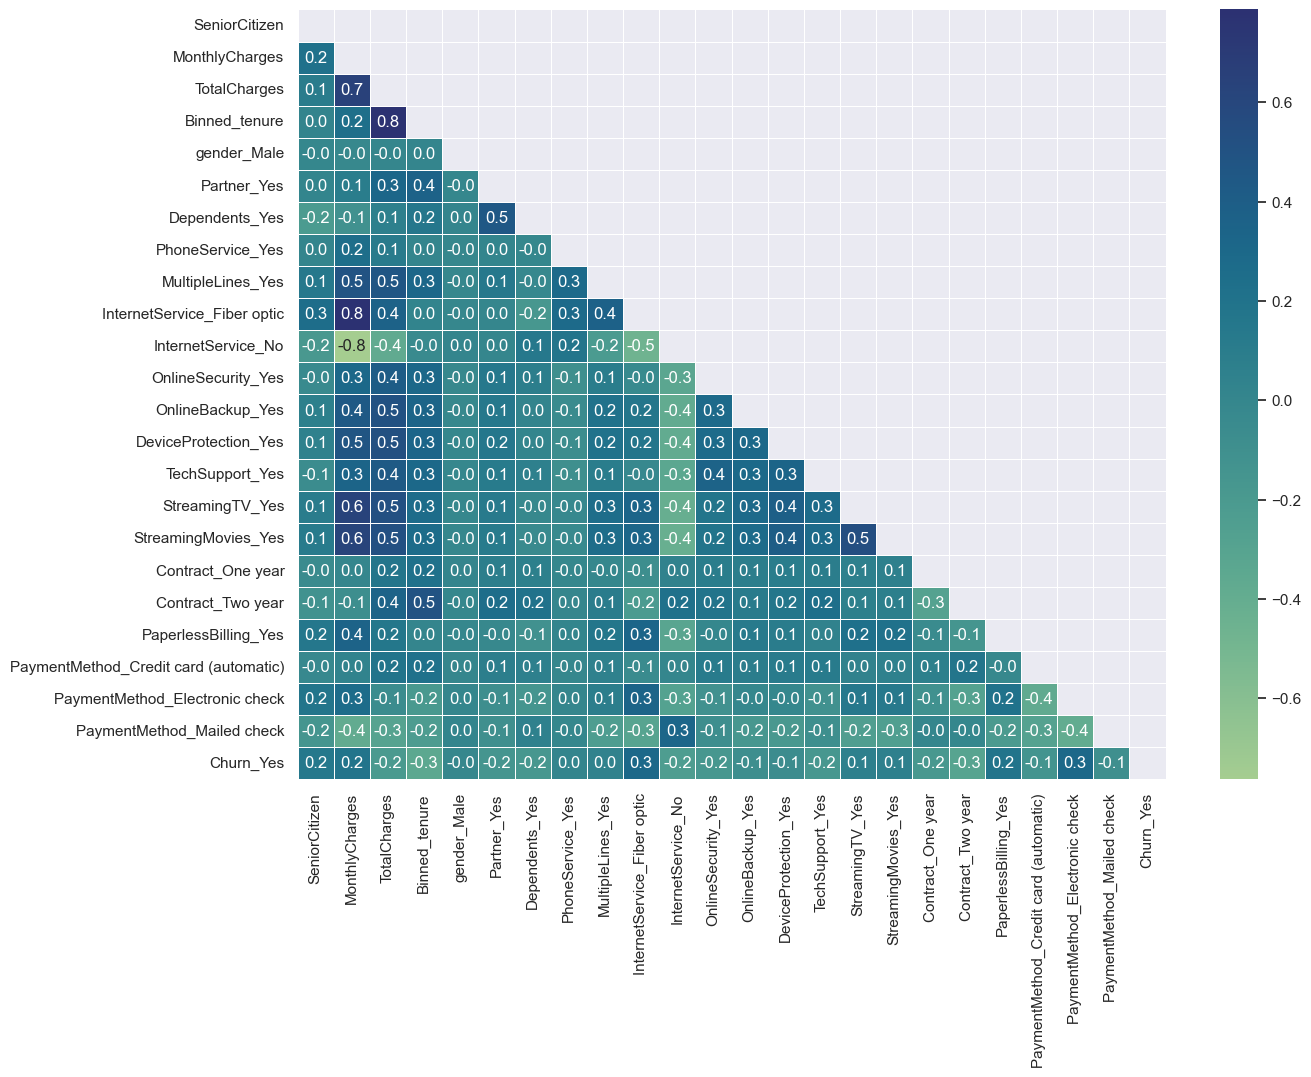

In [216]:
# Correlation matrix for all the test features
corr = pp_df[test_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Display correlation matrix
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pp_df[test_columns].corr(), mask=mask, annot=True, fmt=".1f", cmap="crest", linewidth=.5)
plt.grid(visible = None)
plt.show()

# Logistic Regression - Classifier Model

In [169]:
# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFE

In [205]:
# Define the X and y
X = pp_df.drop(["Binned_tenure", "Churn_Yes"], axis = 1)
y = pp_df["Churn_Yes"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Creatinging scaler object
scaler = MinMaxScaler()

# Scaling X
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model fitting
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction
y_pred = logreg.predict(X_test)

# Accuracy score
print('Accuracy for test data:',accuracy_score(y_test, y_pred).round(3))
print('Accuracy for train data:', accuracy_score(y_train, logreg.predict(X_train)).round(3))

print('\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy for test data: 0.813
Accuracy for train data: 0.803

 [[1391  148]
 [ 247  327]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1539
         1.0       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



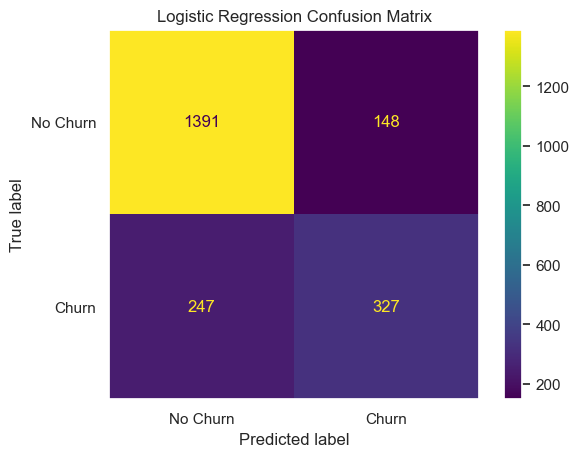

In [176]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['No Churn','Churn'])
cm_display.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.grid(visible = None)
plt.show()

In [177]:
# Coefficients for features
features = dict(zip(X.columns, abs(logreg.coef_[0].round(2))))
features

{'SeniorCitizen': 0.2,
 'tenure': 2.96,
 'MonthlyCharges': 0.08,
 'TotalCharges': 1.13,
 'gender_Male': 0.08,
 'Partner_Yes': 0.0,
 'Dependents_Yes': 0.12,
 'PhoneService_Yes': 0.48,
 'MultipleLines_Yes': 0.25,
 'InternetService_Fiber optic': 0.79,
 'InternetService_No': 0.83,
 'OnlineSecurity_Yes': 0.43,
 'OnlineBackup_Yes': 0.19,
 'DeviceProtection_Yes': 0.01,
 'TechSupport_Yes': 0.29,
 'StreamingTV_Yes': 0.1,
 'StreamingMovies_Yes': 0.32,
 'Contract_One year': 0.63,
 'Contract_Two year': 1.48,
 'PaperlessBilling_Yes': 0.31,
 'PaymentMethod_Credit card (automatic)': 0.07,
 'PaymentMethod_Electronic check': 0.34,
 'PaymentMethod_Mailed check': 0.02}

### Recursive Feature Elimination

In [210]:
# Applying RFE to eleminate features with small coefficients
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 7, verbose = 1)
rfe.fit(X_train, y_train)

# Prediction
y_pred = rfe.predict(X_test)

# Accuracy score
print('Accuracy for test data:',accuracy_score(y_test, y_pred).round(3))
print('Accuracy for train data:', accuracy_score(y_train, rfe.predict(X_train)).round(3))

print('\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Accuracy for test data: 0.802
Accuracy for train data: 0.791

 [[1374  165]
 [ 253  321]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1539
         1.0       0.66      0.56      0.61       574

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



In [220]:
# Features that are left in the model
final_features = X.columns[rfe.support_]
final_features

Index(['tenure', 'TotalCharges', 'PhoneService_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [221]:
# Fitting model with reduced number of features
# Define the X and y
X = pp_df[final_features]
y = pp_df["Churn_Yes"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Creatinging scaler object
scaler = MinMaxScaler()

# Scaling X
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model fitting
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction
y_pred = logreg.predict(X_test)

# Accuracy score
print('Accuracy for test data:',accuracy_score(y_test, y_pred).round(3))
print('Accuracy for train data:', accuracy_score(y_train, logreg.predict(X_train)).round(3))

print('\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy for test data: 0.802
Accuracy for train data: 0.791

 [[1374  165]
 [ 253  321]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1539
         1.0       0.66      0.56      0.61       574

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



In [223]:
dict(zip(X.columns, abs(logreg.coef_[0].round(2))))

{'tenure': 3.16,
 'TotalCharges': 1.45,
 'PhoneService_Yes': 0.58,
 'InternetService_Fiber optic': 1.18,
 'InternetService_No': 0.8,
 'Contract_One year': 0.8,
 'Contract_Two year': 1.82}